In [11]:
%%javascript 
$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

In [12]:
%matplotlib inline

from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from calculate_from_DOS import *

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.style.use('seaborn-notebook')


In this notebook, we'll take a look at the the DOS with some variations of spin splitting of the Landau levels. It is well-known that the simple Zeeman gap is not a good description [Piot PRB 72, 245325 (2005) presents a model as well as good discussion of earlier works].

In [13]:
n_e = 3e15
E_f = E_fermi(n_e)
eps = generate_eps(0.1, 0.1, n_e)
E_f_index = np.where(eps>=E_f)[0][0]
tau_q = 0.5e-12

In [14]:
def label_filling_factors(ax, nu_arr, n_e, ypos, **kwargs):
    x,y = kwargs.pop('data', [None,None])
    for nu in nu_arr:
        B = n_e * h / (q_e * nu)
        if y is None:
            ymin = 0
        else:
            ymin = np.average(y[(x>B*0.95)*(x<B*1.05)])
            print ymin
        ax.annotate (str(nu), [B,ymin], [B, ypos], **kwargs)
        print B

6.20350149661
4.13566766441
3.1017507483
2.48140059864
2.0678338322
1.55087537415


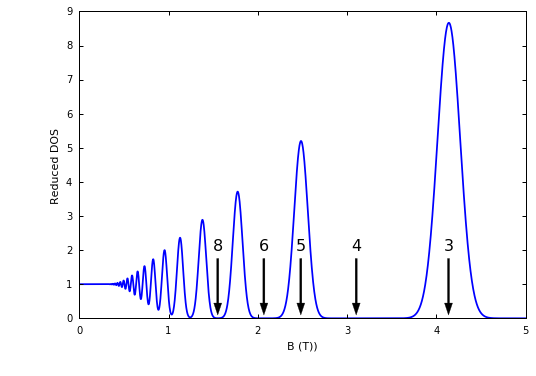

In [15]:
B_arr = np.linspace (0.001, 5, 2000)
D_ns = np.array([generate_DOS(B, tau_q, eps=eps,broadening='Gaussian')[1][E_f_index] for B in B_arr])
plt.plot(B_arr, D_ns)
label_filling_factors(plt.gca(), np.array([2, 3, 4, 5, 6, 8]), n_e, 2, 
                      arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=8),
                     horizontalalignment='center')
plt.xlabel('B (T))')
plt.ylabel('Reduced DOS')

6.20350149661
4.13566766441
3.1017507483
2.48140059864
2.0678338322
1.55087537415


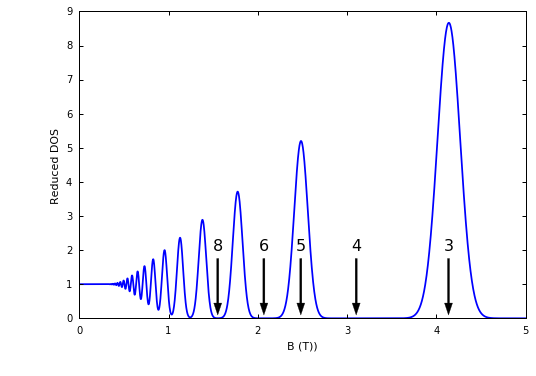

In [16]:
zeeman = lambda B: spin_gap(B, 0.44)
D_zs = np.array([generate_DOS(B, tau_q, eps=eps, broadening='Gaussian', E_spin=zeeman)[1][E_f_index] for B in B_arr])
plt.plot(B_arr, D_ns)
label_filling_factors(plt.gca(), np.array([2, 3, 4, 5, 6, 8]), n_e, 2, 
                      arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=8),
                     horizontalalignment='center')
plt.xlabel('B (T))')
plt.ylabel('Reduced DOS')

0.00766468538263
4.13566766441
0.0087559249095
3.1017507483
0.452162325106
2.48140059864
0.248827321663
2.0678338322
0.985149819143
1.77242899903
0.627270773208
1.55087537415


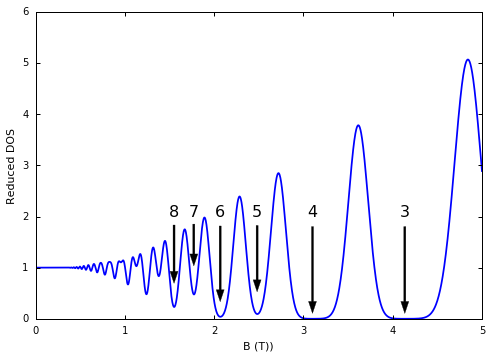

In [17]:
g_13 = lambda B: spin_gap(B, 13)
D_13 = np.array([generate_DOS(B, tau_q, eps=eps, broadening='Gaussian', E_spin=g_13)[1][E_f_index] for B in B_arr])
plt.plot(B_arr, D_13)
label_filling_factors(plt.gca(), np.array([3, 4, 5, 6, 7, 8]), n_e, 2, data=[B_arr,D_13], 
                      arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=8),
                     horizontalalignment='center')
plt.xlabel('B (T))')
plt.ylabel('Reduced DOS')